In [64]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
import seaborn as sns
plt.rcParams['savefig.dpi'] = 200
Cat = [3,20, 21, 26, 333, 334, 335]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB']


In [ ]:
typ = 3
for did in NonCat:
    for amount in amountList:
        featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
for did in Cat:
    for amount in amountList:
        featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
amountList = [0,0.5,0.75,1,1.5,2,3,4,5,6]
for amount in amountList:
    for did in NonCat:
        cv_feature(did,cv,amount)
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
for amount in amountList:
    for did in Cat:
        cv_feature(did,cv,amount)

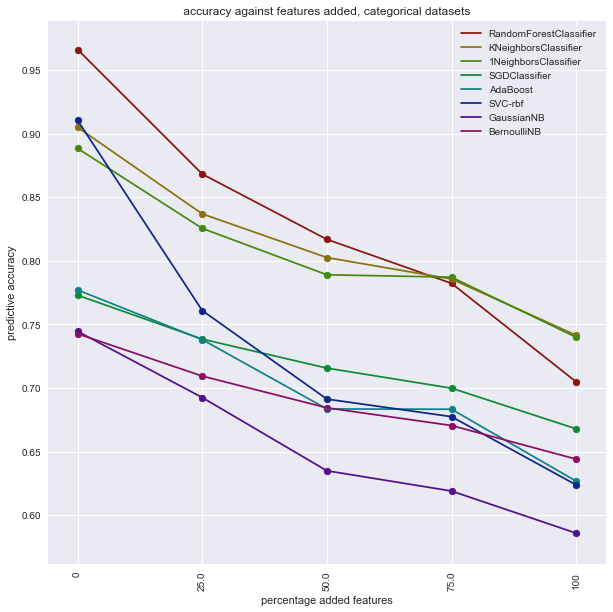

In [60]:

didList = Cat
scores = []
amountList = [0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList = [0,0.25,0.5,0.75,1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, categorical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

## Analysis
Both Naive Bayes show crippling results with increased features

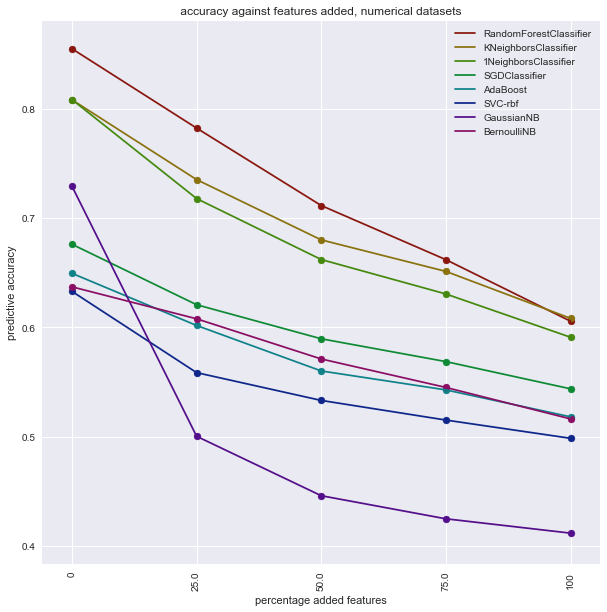

In [65]:
didList = NonCat
scores = []
amountList = [0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList = [0,0.25,0.5,0.75,1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, numerical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

## Feature addition to numerical and categorical datasets
From the total amount of features a uniformly random selection is made and the selected features are added to the dataset. So for a dataset of 100 features, when there are 25% added features, 25 uniformly random numbers between 0 and 100 are made and the features corresponding to that number in the feature list is added to the dataset, giving a dataset of 125 features.
### Analysis
The randomforestclassifier has the best initial performance, but shows the steep slope, followed by the KNeighborsClassifier with a single neighbour. 
The impact of the added features to the randomForestClassifier does not seem obvious as there is no change in the data. The impact of the added feature maybe only because the forest is limited by the default hyperparameters in the amount of tree. This means that it takes longer to randomly find the best features. 

The same may hold for the KNeighborsClassifier but it does not explain the Classifier with only 1 Neighbor, I have not figured out what explains this behaviour.

The GuassianNB has the worst results with the added features.
The BernoulliNB has the least steep decline in performance but it performed only average. The decline can be explained by bad features being impacting the performance. 
Adaboost,SVC-rbf and SGDClassifier show similar results, the ensembles are influenced like the RandomForestClassifier. All three show only average results with the default parameters.

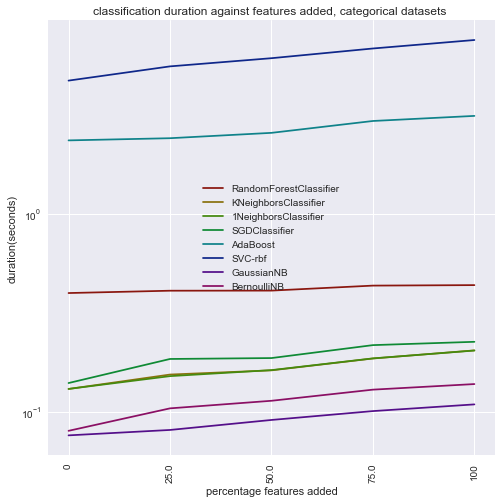

In [81]:
didList = Cat
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'

dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
x_axis = range(0,len(dur2[0])) 
amountList = [0,0.25,0.5,0.75,1] 
for i,x in enumerate(amountList):
    amountList[i] = x*100
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

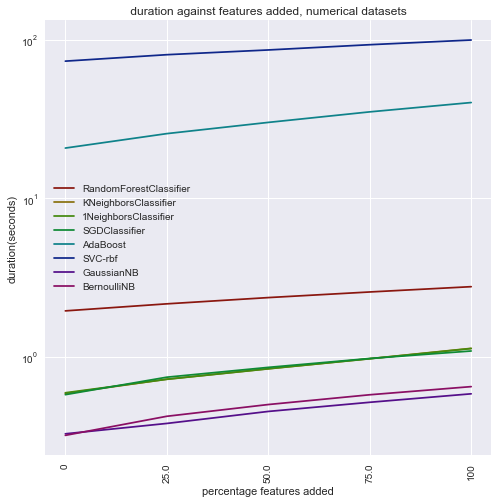

In [82]:
func = 'cvScoreFeatures5'
didList = NonCat
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
x_axis = range(0,len(dur2[0])) 
amountList = [0,0.25,0.5,0.75,1] 
for i,x in enumerate(amountList):
    amountList[i] = x*100
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features added, numerical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

## analysis categorical and numerical classification duration
On this logscale most classifier do not have a significant change in duration. 
In particular RandomForestClassifier seems nearly unaffacted by the feature addition.
The KneighborsClassifier also show little difference between a single neighbor and the default setting of 5 neighbors with categorical datasets. The difference is a bit more noticable with numerical datasets
The lines are also a bi tmore steeper with the numerical datasets.

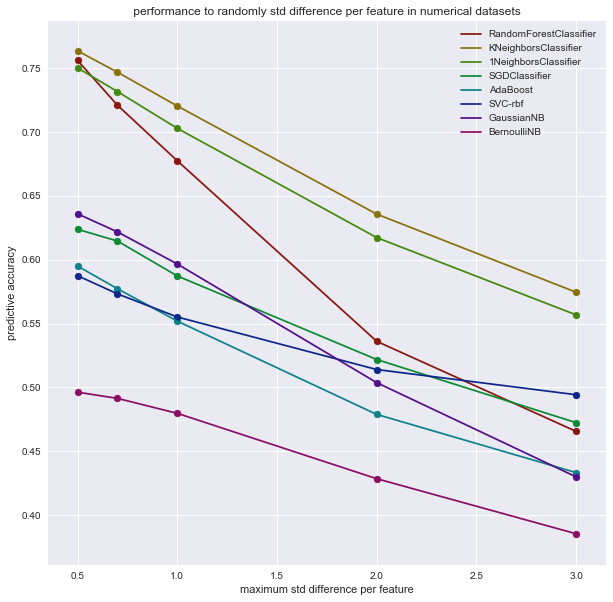

In [24]:
func = 'cvfeatureSTD1'
scores = []
amountList = [0.5,0.7,1,2,3]
didList = NonCat#[12,14,16,18,22,28,30,32,36,37]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()


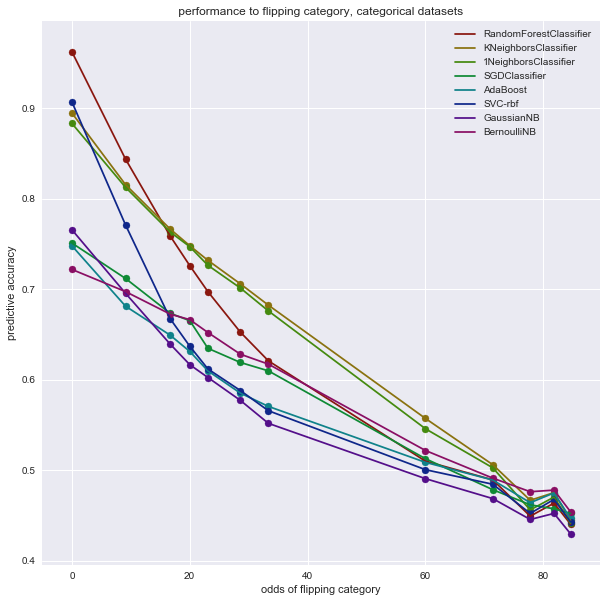

In [7]:
func = 'cvfeatureCAT2'
scores = []
score1 = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = [20, 21, 26, 333, 334, 335]#, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
flipped = []
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
fig, ax = plt.subplots()
_=plt.title(' performance to flipping category, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

In [41]:
Cat = [20, 21, 26, 333, 334, 335]

In [50]:
NonCat

[1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54]

In [77]:
didList

[3, 20, 21, 26, 333, 334, 335]